# Performing EDA on "drug use by age" data.

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.


In [1]:
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
drug = pd.read_csv('drug-use-by-age.csv') #use pandas built-in function to read csv file
drug.head(2)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


In [5]:
drug.info()  #check the overall information
# the results show there is no null in any column, however 'object' implies some columns have invalid values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [6]:
def disp_invalid(df,column_name):  #to find out all distinct invalid value in the specified column 
    return df[column_name].unique()


In [7]:
# the list of the columns that contain invalid values:
inv_list=['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']
# initialize the dictionary v_list that will store all the invalid values for these columns
v_list={'cocaine-frequency':[],'crack-frequency':[],'heroin-frequency':[],'inhalant-frequency':[],'oxycontin-frequency':[],'meth-frequency':[]}
for l in inv_list:
    print(l)
    for x in disp_invalid(drug,l):
        try:
            x=float(x)
        except:
            v_list[l].append(x)

            
v_list                  #list all the invalid values for all the columns
    

cocaine-frequency
crack-frequency
heroin-frequency
inhalant-frequency
oxycontin-frequency
meth-frequency


{'cocaine-frequency': ['-'],
 'crack-frequency': ['-'],
 'heroin-frequency': ['-'],
 'inhalant-frequency': ['-'],
 'meth-frequency': ['-'],
 'oxycontin-frequency': ['-']}

These columns only have '-' other than numbers

In [8]:
#to replace the invalid values(strings) with '0' in these columns in the list inv_list:
for l in inv_list:
    for v in range(len(v_list[l])):
        drug[l]=drug[l].replace(v_list[l][v],'0')
    drug[l]=drug[l].apply(lambda x: float(x))

drug.head(2)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


all the '-' are replaced with 0.0

In [9]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [10]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [11]:
print(drug.age)

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object


In [12]:
drug['nage']=[12,13,14,15,16,17,18,19,20,21,22.5,24.5,27.5,32,42,57,66]

In [13]:
drug=drug[drug.nage>18] #to filter out illegal alcohol users
drug.head(2)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,nage
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20.0


# High-level, initial overview of the data


Text(0.5,1,'Drugs use percentage over the past 12 months')

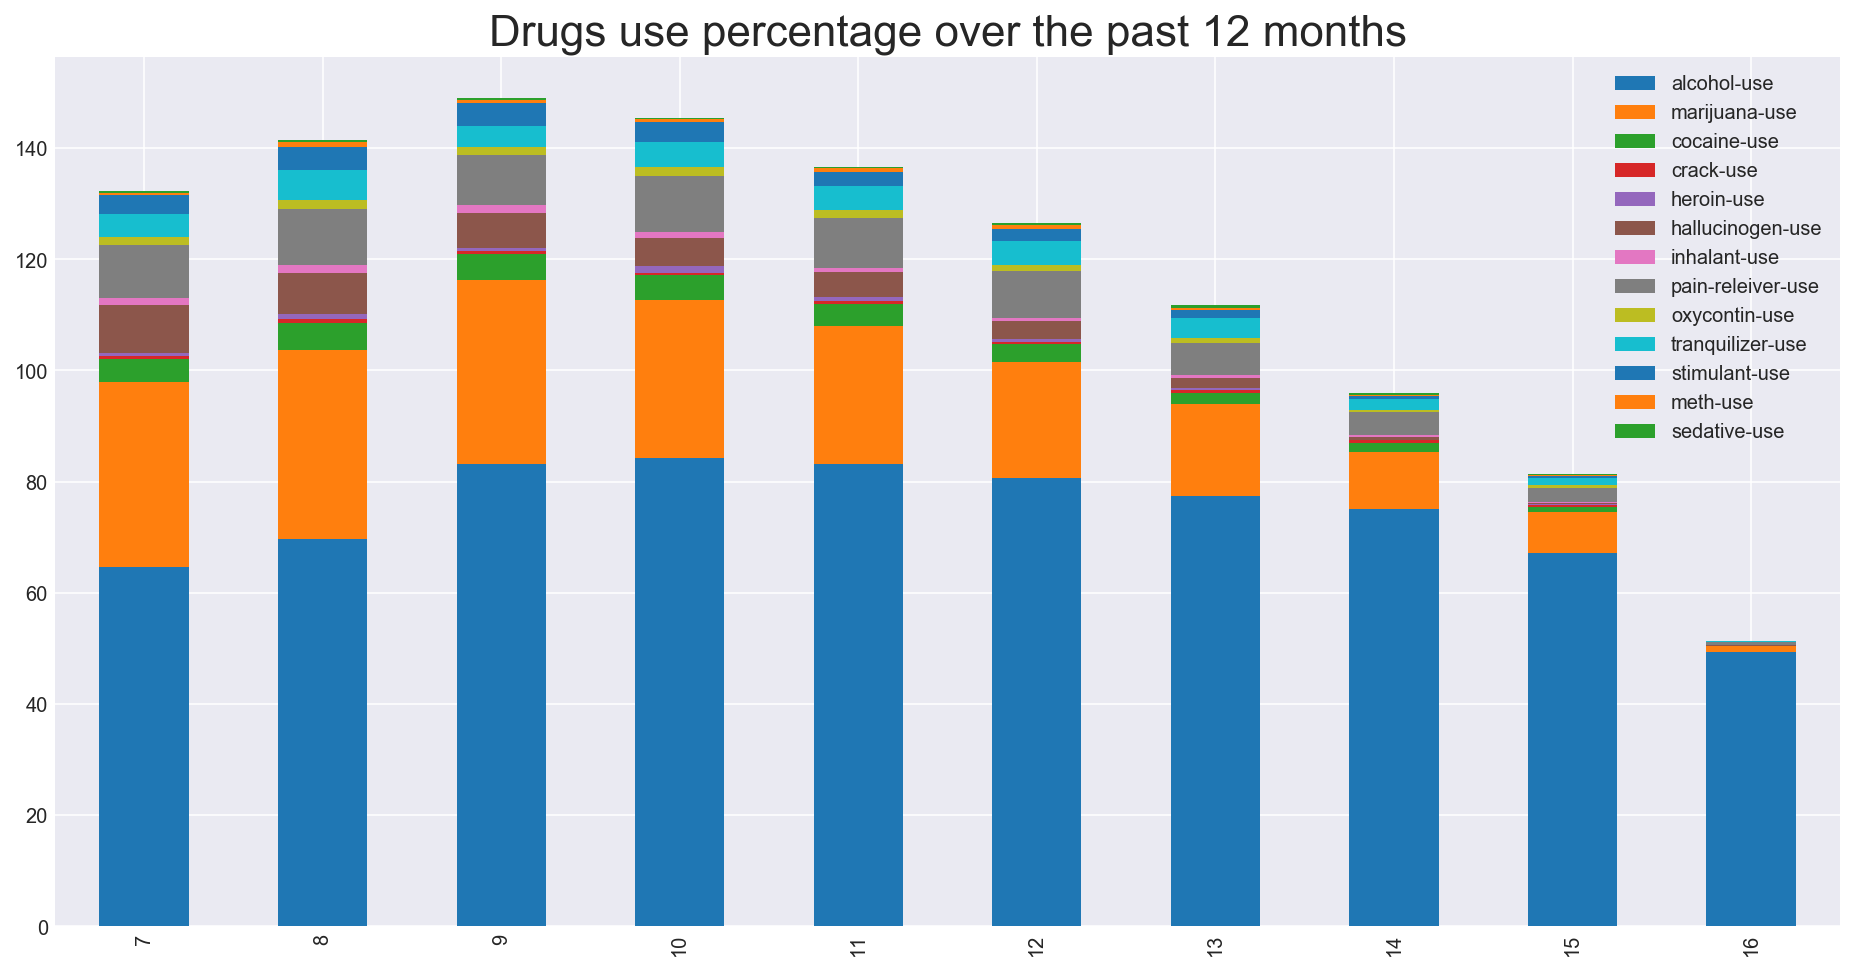

In [14]:
ax=drug[['alcohol-use', 'marijuana-use','cocaine-use', 'crack-use','heroin-use', 'hallucinogen-use',
       'inhalant-use',  'pain-releiver-use',  'oxycontin-use','tranquilizer-use', 
       'stimulant-use', 'meth-use',     'sedative-use']].plot(kind='bar', stacked=True, figsize=(16,8))
ax.set_title('Drugs use percentage over the past 12 months', fontsize=22)

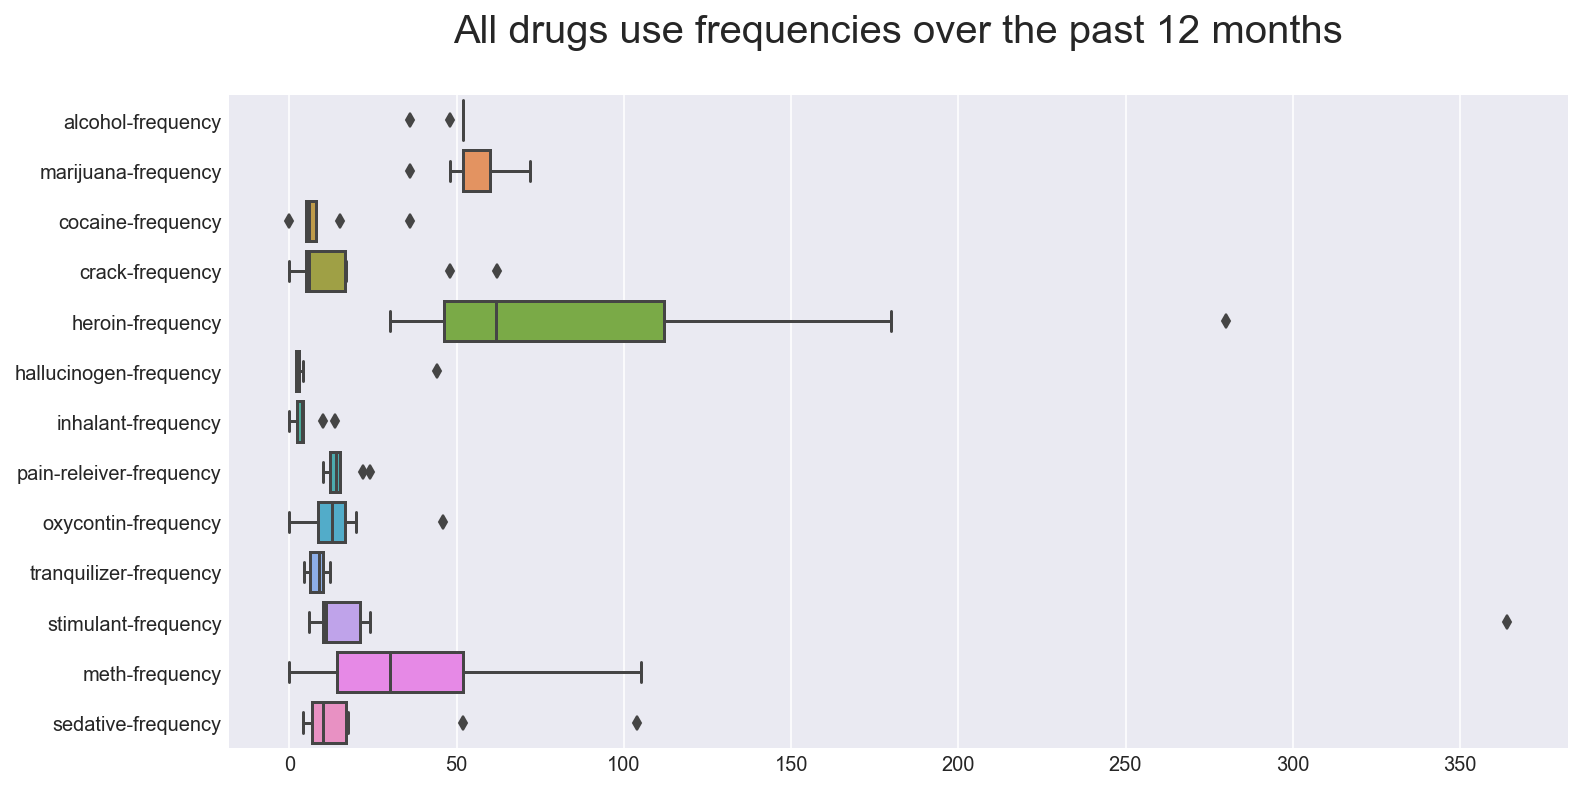

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=drug[['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency',  'crack-frequency', 'heroin-frequency', 
       'hallucinogen-frequency',  'inhalant-frequency', 'pain-releiver-frequency', 
       'oxycontin-frequency',  'tranquilizer-frequency','stimulant-frequency',  'meth-frequency',
        'sedative-frequency']], orient='h')

ax.set_title('All drugs use frequencies over the past 12 months\n',fontsize=20)
plt.show()

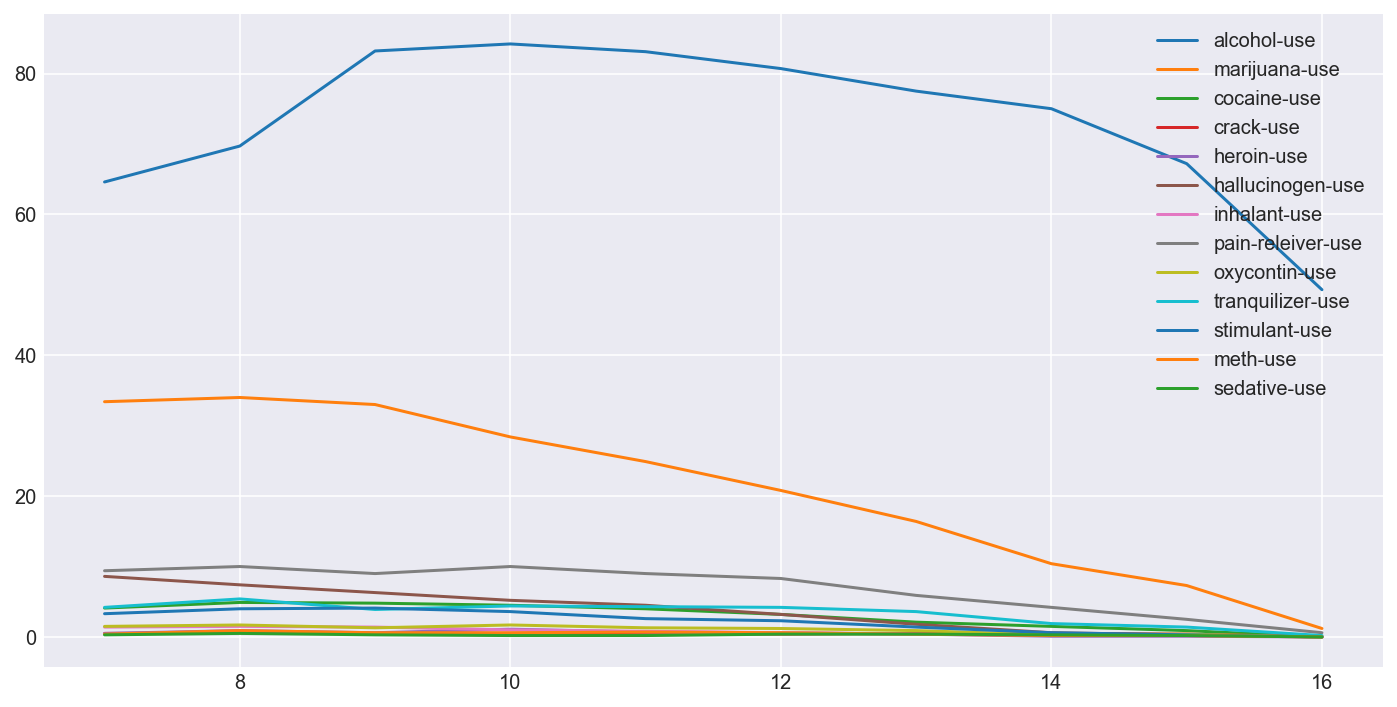

In [16]:
drug[['alcohol-use', 'marijuana-use','cocaine-use', 'crack-use','heroin-use', 'hallucinogen-use',
       'inhalant-use',  'pain-releiver-use',  'oxycontin-use','tranquilizer-use', 
       'stimulant-use', 'meth-use',     'sedative-use']].plot(figsize=(12,6))

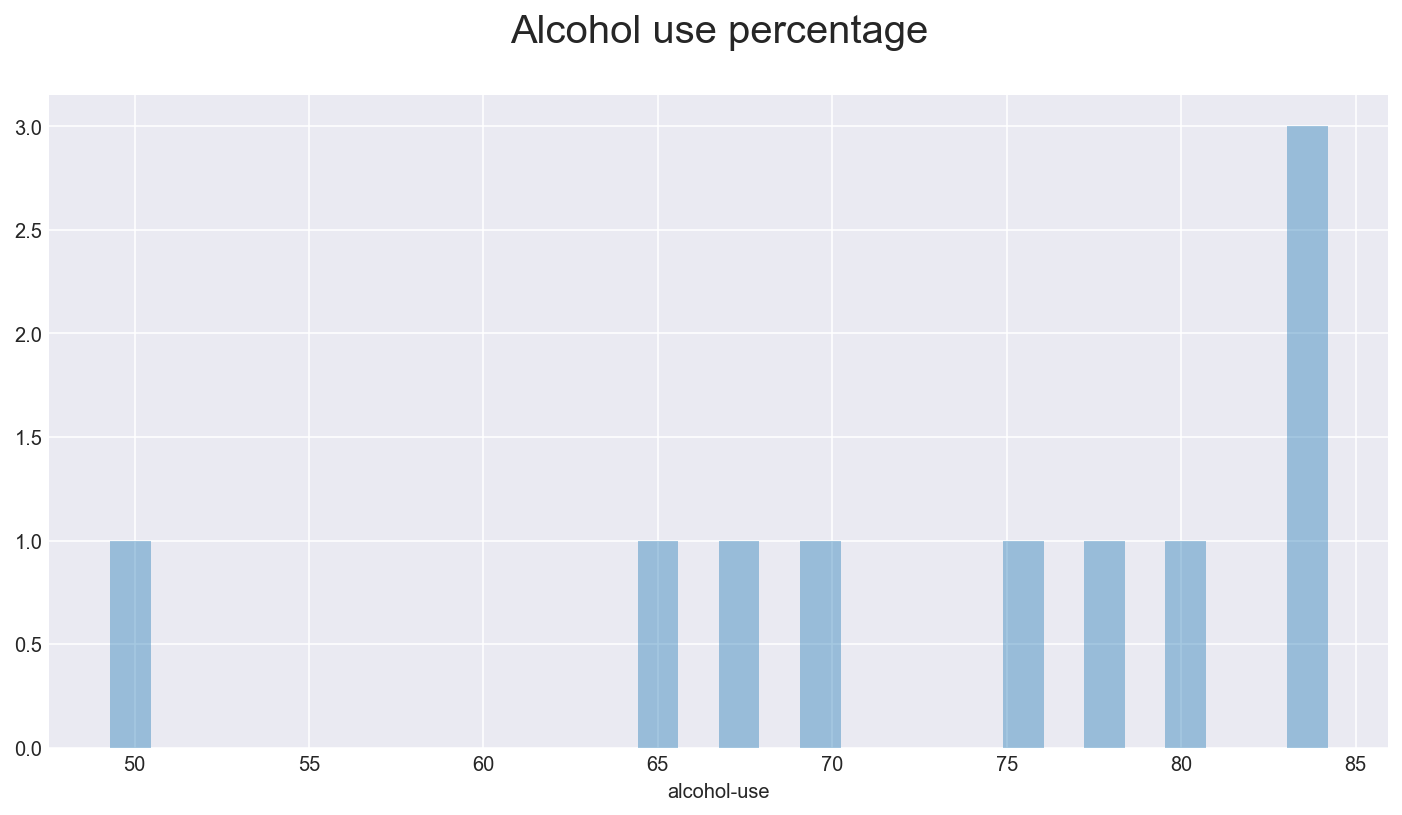

In [17]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.distplot(drug['alcohol-use'],bins=30, kde=False)
ax.set_title('Alcohol use percentage\n',fontsize=20)
plt.show()

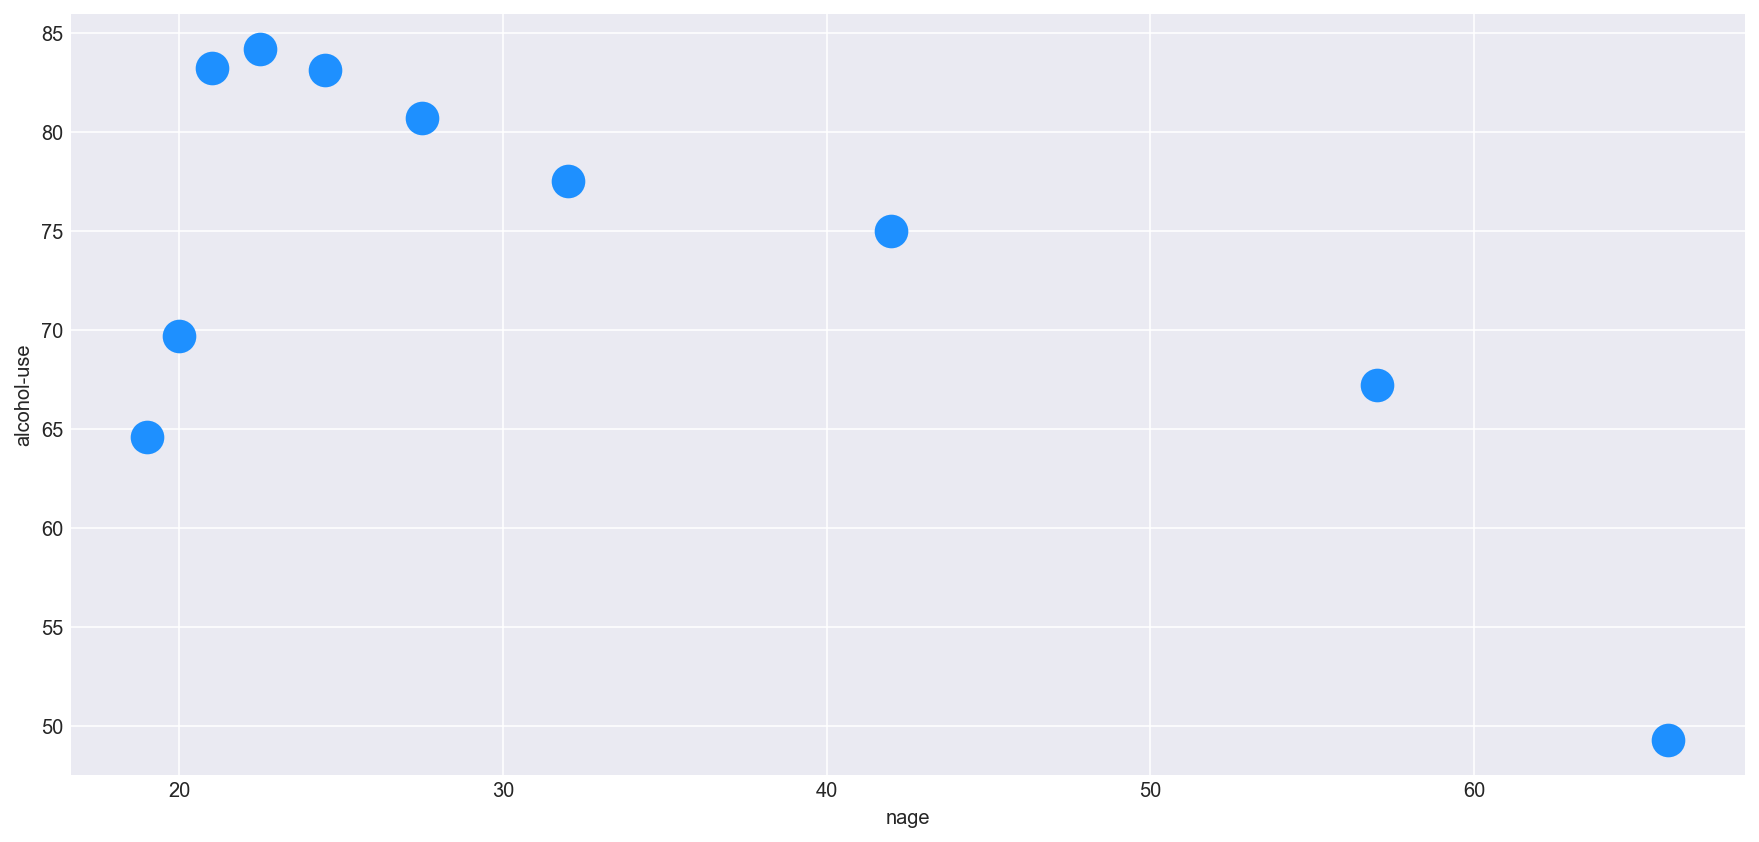

In [18]:
drug.plot(x='nage',y='alcohol-use', kind='scatter', color='dodgerblue',    figsize=(15,7), s=250)

In [19]:
drug[['alcohol-use','marijuana-use']].corr()

,alcohol-use,marijuana-use
alcohol-use,1.000000,0.516624
marijuana-use,0.516624,1.000000


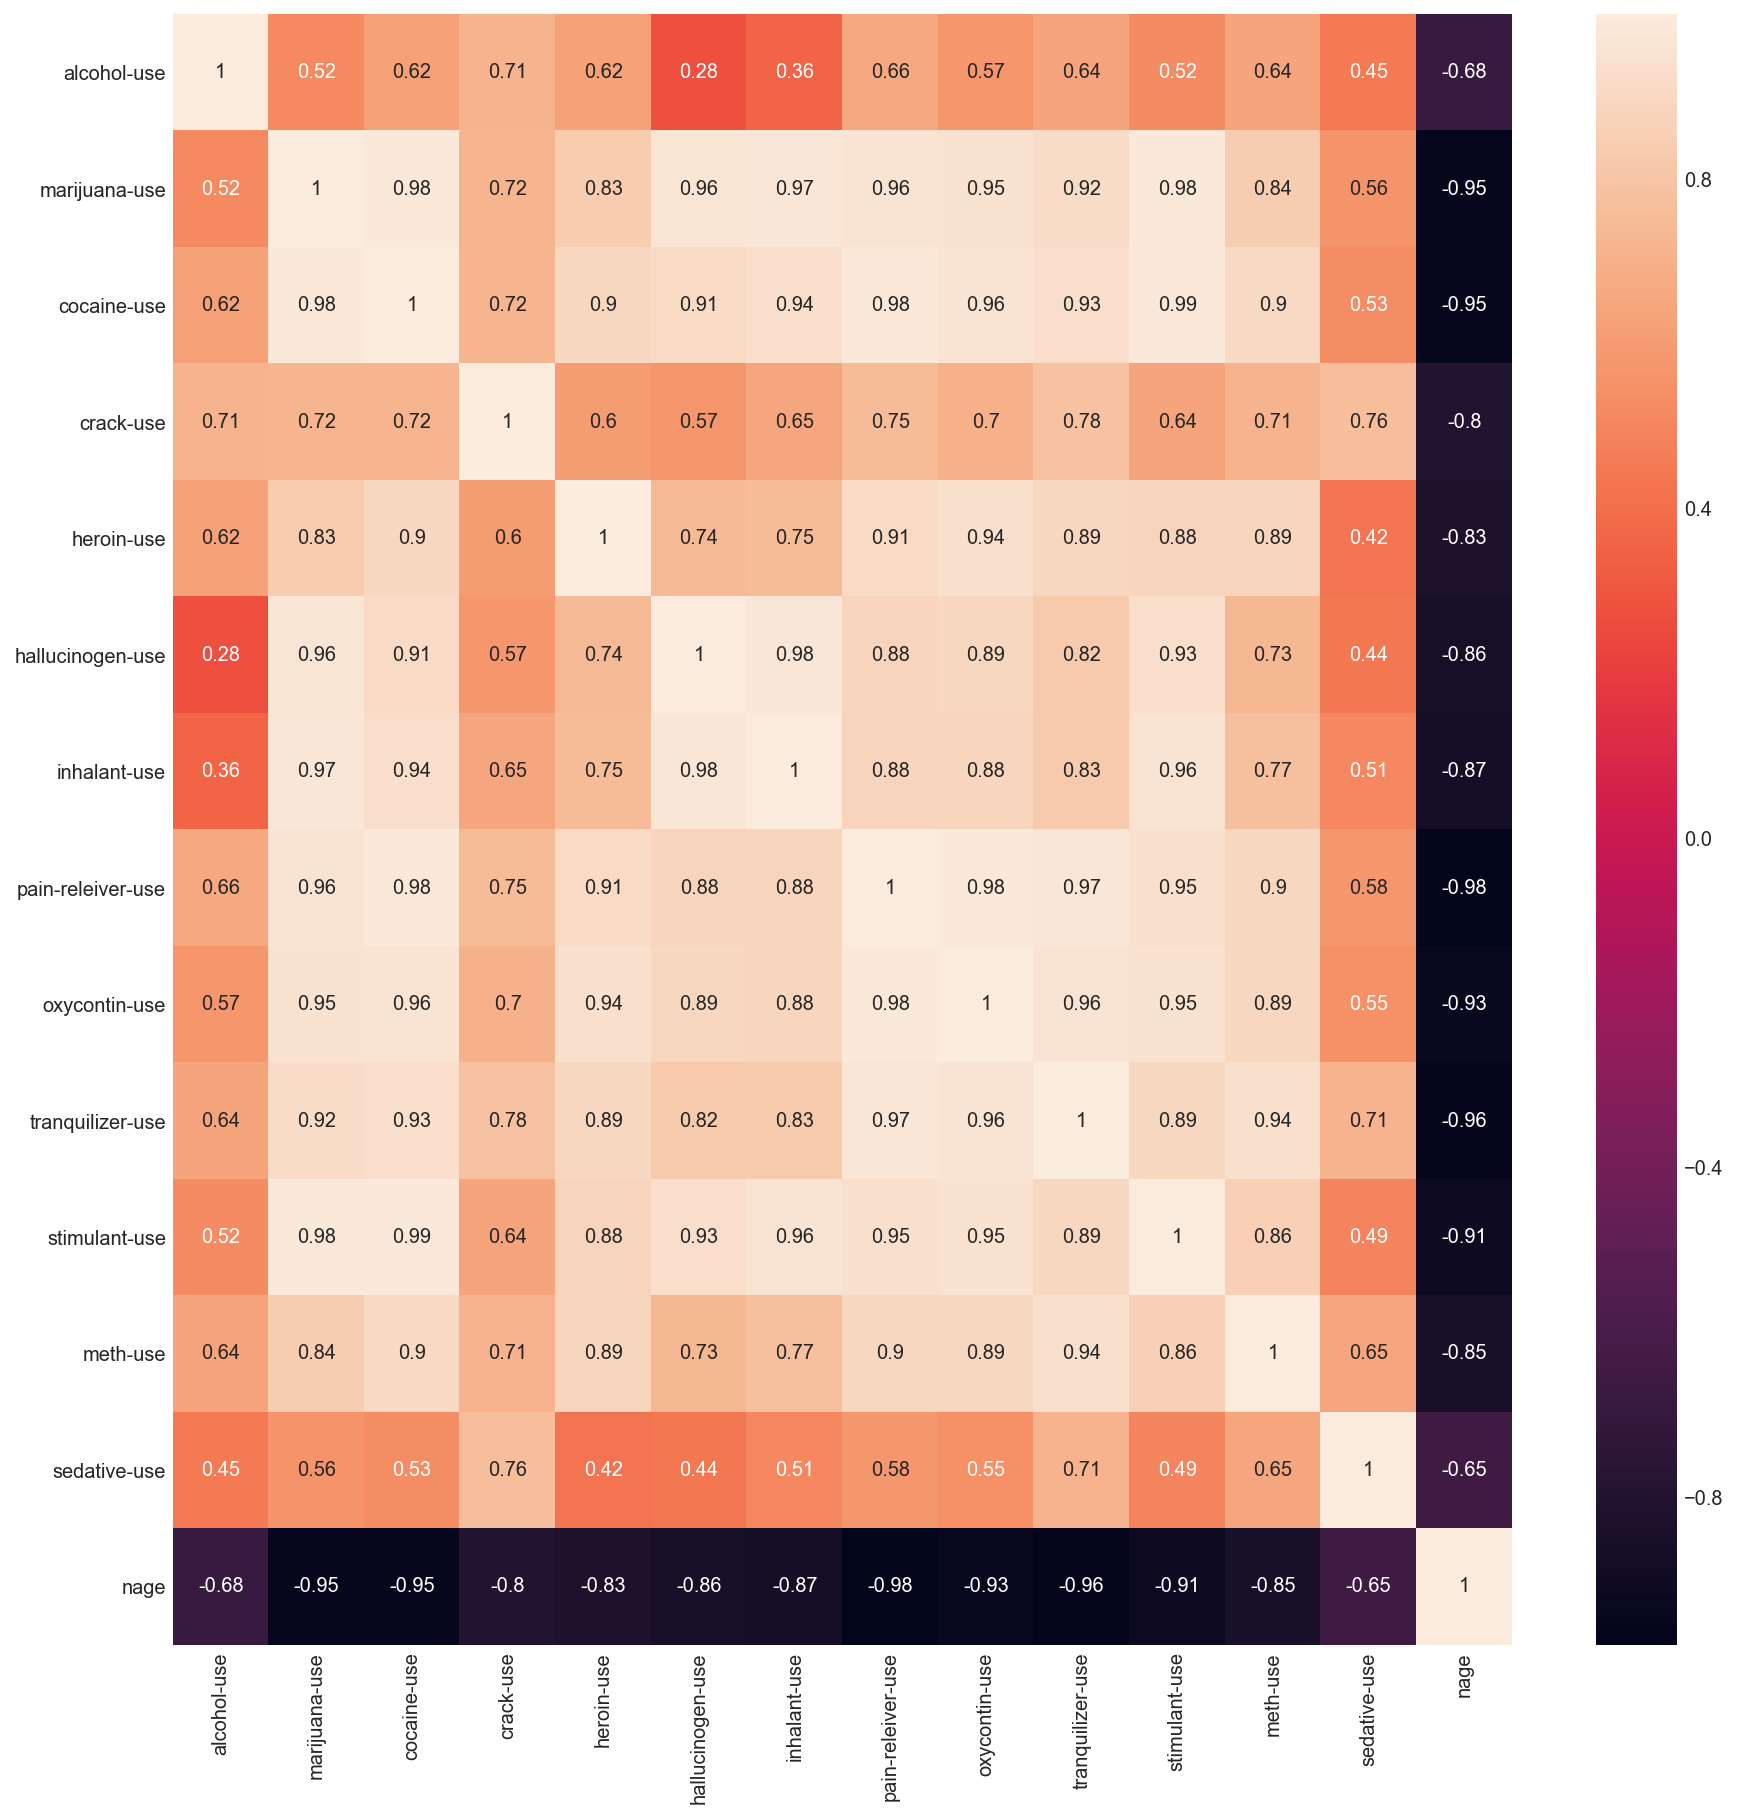

In [20]:
drug_age_druguse=drug[['alcohol-use',  'marijuana-use',
        'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use',
       'inhalant-use', 
       'pain-releiver-use', 'oxycontin-use',
        'tranquilizer-use', 
       'stimulant-use',  'meth-use', 
       'sedative-use', 'nage']]
plt.figure(figsize=(15,15))
sns.heatmap(drug_age_druguse.corr(), annot=True)

In [21]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,nage
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3540.000000,73.450000,50.000000,20.980000,54.400000,3.000000,9.350000,0.440000,16.60000,0.500000,...,14.700000,3.350000,8.250000,2.220000,47.900000,0.460000,40.400000,0.280000,23.150000,33.150000
std,1655.831782,11.003964,5.077182,11.785188,9.465728,1.758156,10.088635,0.164655,21.16706,0.359011,...,12.450346,1.627711,2.530371,1.557634,111.243926,0.271621,37.918626,0.139841,31.694768,16.561418
min,2223.000000,49.300000,36.000000,1.200000,36.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.200000,4.500000,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,19.000000
25%,2377.500000,67.825000,52.000000,11.900000,52.000000,1.650000,5.000000,0.425000,5.00000,0.175000,...,8.625000,2.325000,6.250000,0.800000,10.000000,0.250000,14.250000,0.200000,6.750000,21.375000
50%,2746.000000,76.250000,52.000000,22.850000,52.000000,3.600000,5.750000,0.500000,6.00000,0.550000,...,12.750000,4.050000,9.000000,2.450000,11.000000,0.500000,30.000000,0.300000,10.000000,26.000000
75%,4424.000000,82.500000,52.000000,31.850000,60.000000,4.400000,8.000000,0.500000,16.50000,0.675000,...,16.500000,4.275000,10.000000,3.525000,21.000000,0.600000,52.000000,0.375000,16.875000,39.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.00000,1.100000,...,46.000000,5.400000,12.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000,66.000000


# Create a testable hypothesis about this data


The null hypothesis H0: the mean value of 'marijuana-use' of people whose age is within 22-34 is the same as the whole group's mean 'marijuana-use'
the alternative hypothesis H1: their mean values are different


In [22]:
drug_22_34=drug[(drug.nage>=22) & (drug.nage<34)]
drug_22_34

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,nage
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0,22.5
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5,24.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0,27.5
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0,32.0


In [23]:
print(drug_22_34['marijuana-frequency'].mean(),drug['marijuana-frequency'].mean())

59.0 54.4


Before going to validate H0, the mean value of 'marijuana-frequency' of the two groups are printed and compared. The values are close.

In [24]:
#call the t-statistic validation method in scipy.stats
stats.ttest_ind(drug_22_34['marijuana-frequency'],drug['marijuana-frequency'])


Ttest_indResult(statistic=0.8217343330514553, pvalue=0.42725346329958125)

Since pvalue of the t-statistic is very high, H0 CAN NOT rejected. It can be concluded that the age group (22-40)'s mean value of 'marijuana-frequency' is not different to the whole group's.